# <u>Spotify Hit Predictor Model for 00's Dataset</u>

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

### Loading Dataset

In [2]:
df=pd.read_csv("dataset-of-00s.csv")
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
track               5872 non-null object
artist              5872 non-null object
uri                 5872 non-null object
danceability        5872 non-null float64
energy              5872 non-null float64
key                 5872 non-null int64
loudness            5872 non-null float64
mode                5872 non-null int64
speechiness         5872 non-null float64
acousticness        5872 non-null float64
instrumentalness    5872 non-null float64
liveness            5872 non-null float64
valence             5872 non-null float64
tempo               5872 non-null float64
duration_ms         5872 non-null int64
time_signature      5872 non-null int64
chorus_hit          5872 non-null float64
sections            5872 non-null int64
target              5872 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 871.8+ KB


In [4]:
df.shape

(5872, 19)

### Shuffling of Data

In [5]:
df=df.sample(frac=1)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
3439,Crusaders' Anthem,Dream Evil,spotify:track:4OA8XBbqWSp04FI6ZpX8gu,0.377,0.856,0,-3.696,1,0.0425,0.000366,0.23400,0.0951,0.461,85.800,261440,4,51.21550,8,0
684,Honey,Erykah Badu,spotify:track:2z4ypE6YI1mybsczNx4eRU,0.399,0.802,6,-7.869,0,0.3500,0.027300,0.00387,0.1870,0.437,87.818,320973,4,41.45883,14,1
1132,I Like That,"Houston Featuring Chingy, Nate Dogg & I-20",spotify:track:4MMqj7HaLL8BphbBZnlsdq,0.797,0.502,10,-3.925,0,0.0968,0.015400,0.00000,0.1000,0.385,106.997,236520,4,16.37461,13,1
4331,Never Too Late,Three Days Grace,spotify:track:3HE50TVRquwXe9yv2HFoNL,0.433,0.778,2,-4.680,0,0.0371,0.008380,0.00000,0.1630,0.217,149.864,209333,4,25.83154,11,1
112,I Touch Myself,Jan Wayne,spotify:track:5GrqtGJhoa6EqvCUs5fVYf,0.636,0.993,5,-5.203,0,0.0508,0.008780,0.26800,0.2600,0.478,141.970,223947,4,56.28675,11,0


### Balancing of Data

In [6]:
#Dropping Categorical features
X=df.drop(['target',"track","artist","uri"],axis=1)
X.shape    #modified dataframe for X

(5872, 15)

In [7]:
Y=df["target"]
hit_flop_count=Y.value_counts()
hit_flop_count

1    2936
0    2936
Name: target, dtype: int64

In [8]:
Y=Y.values

### Standardizing the Inputs

In [9]:
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)

### Split the dataset into Train, Test, Validation set

In [10]:
#train-test split in 90%-10%
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, 
                                test_size=0.1, random_state=1)

In [11]:
#Train-Validation split 90%-10%
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, 
                                test_size=(1/9), random_state=1)
#1/9 of 90% is 10% as we are using train if we use Scaled X then we use test size as 0.1

In [12]:
x_train.shape,x_test.shape,x_val.shape

((4696, 15), (588, 15), (588, 15))

### Creating Deep Learning Algorithm

In [13]:
nn = 200 #number of neurons in hidden layers
target_count = 2              #ouput i.e. 1 and 0

In [14]:
model_00 = keras.Sequential([

keras.layers.Flatten(), #to flaten our data for better results 
keras.layers.Dense(nn, activation=tf.nn.relu),# first hidden  layer
keras.layers.Dense(nn, activation=tf.nn.relu),# second hidden layer
keras.layers.Dense(nn, activation=tf.nn.relu),# third hidden layer

keras.layers.Dense(target_count, activation=tf.nn.softmax)# output layer
    
    ])

In [15]:
model_00.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

In [16]:
#fitting the model 
model_fit = model_00.fit(x_train, y_train, epochs=20,
                         validation_data=(x_val, y_val), batch_size=100)

Epoch 1/6
16/16 [==============================] - 0s 9ms/step - loss: 0.5230 - accuracy: 0.7406 - val_loss: 0.3735 - val_accuracy: 0.8418
Epoch 2/6
16/16 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8271 - val_loss: 0.3394 - val_accuracy: 0.8554
Epoch 3/6
16/16 [==============================] - 0s 3ms/step - loss: 0.3621 - accuracy: 0.8390 - val_loss: 0.3362 - val_accuracy: 0.8673
Epoch 4/6
16/16 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8473 - val_loss: 0.3334 - val_accuracy: 0.8639
Epoch 5/6
16/16 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.8522 - val_loss: 0.3383 - val_accuracy: 0.8554
Epoch 6/6
16/16 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8578 - val_loss: 0.3311 - val_accuracy: 0.8622


In [17]:
#Storing the predictions
predictions = model_00.predict(x_test)

### Visualize Neural Network Loss History

#### Loss Variation Plot

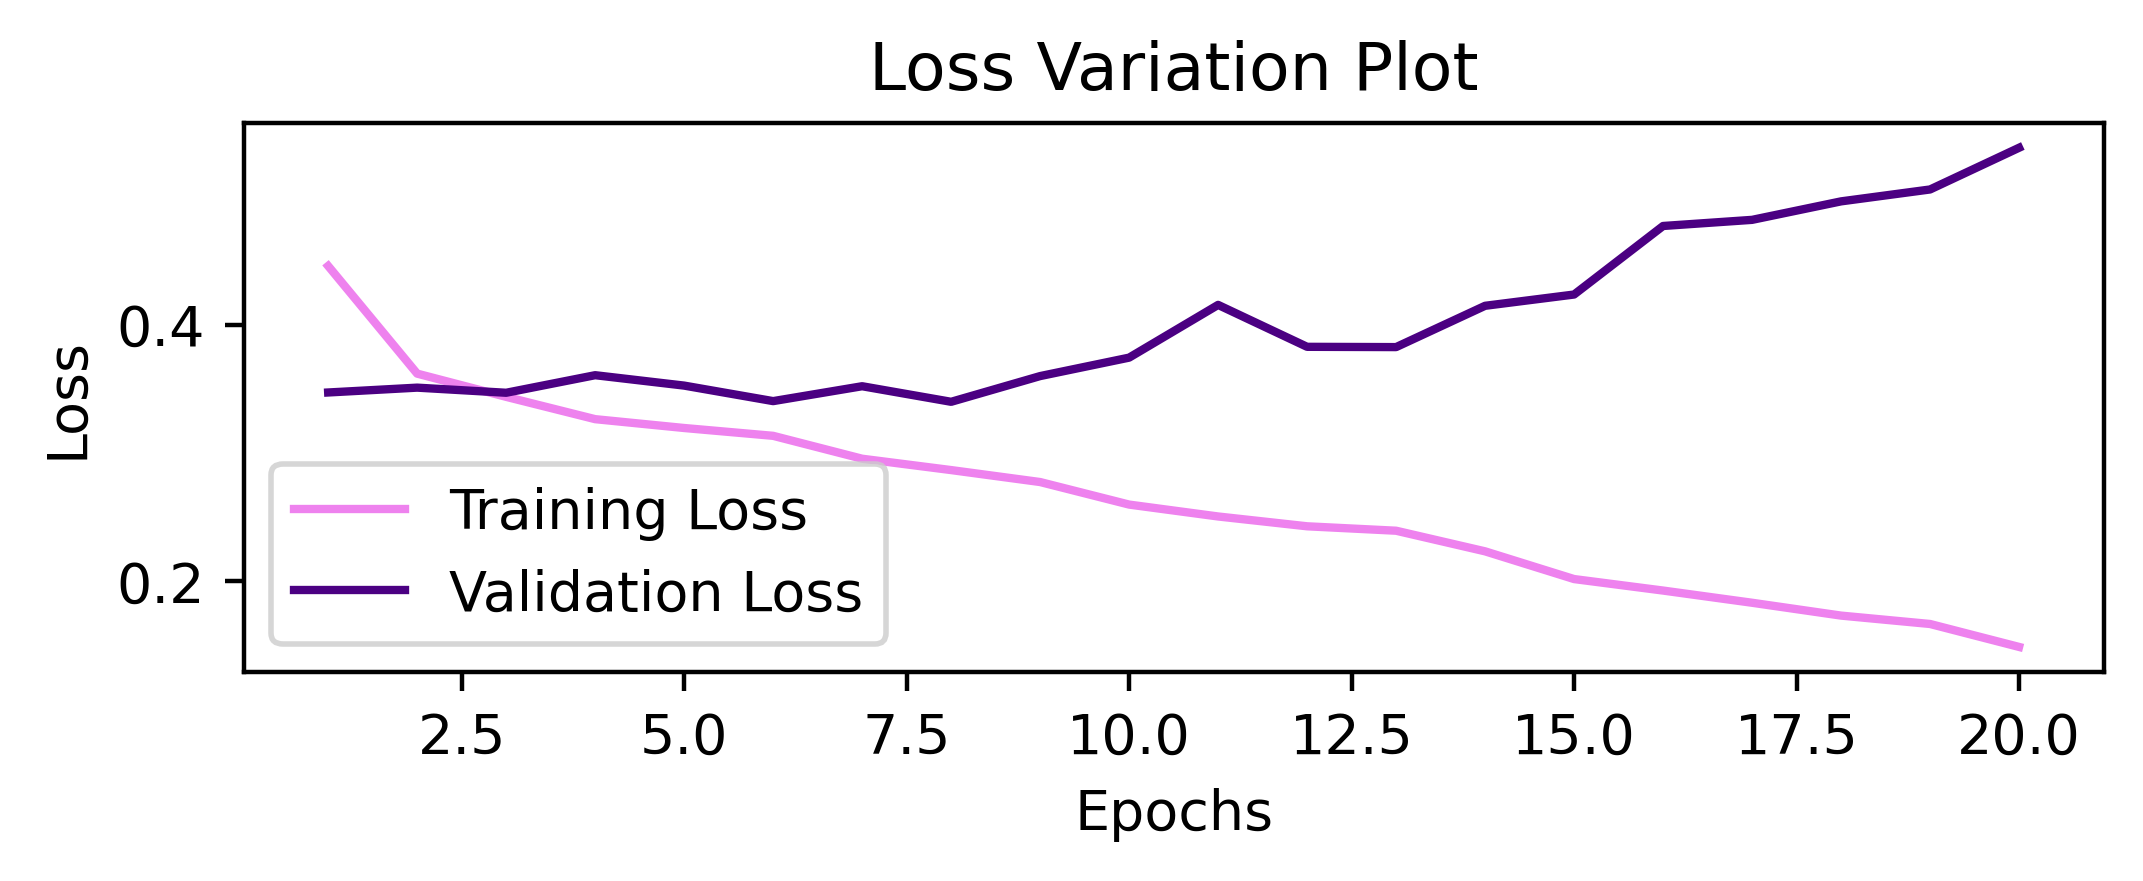

In [18]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

#-------------plotting--------------------------

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


#### Accuracy Variation Plot

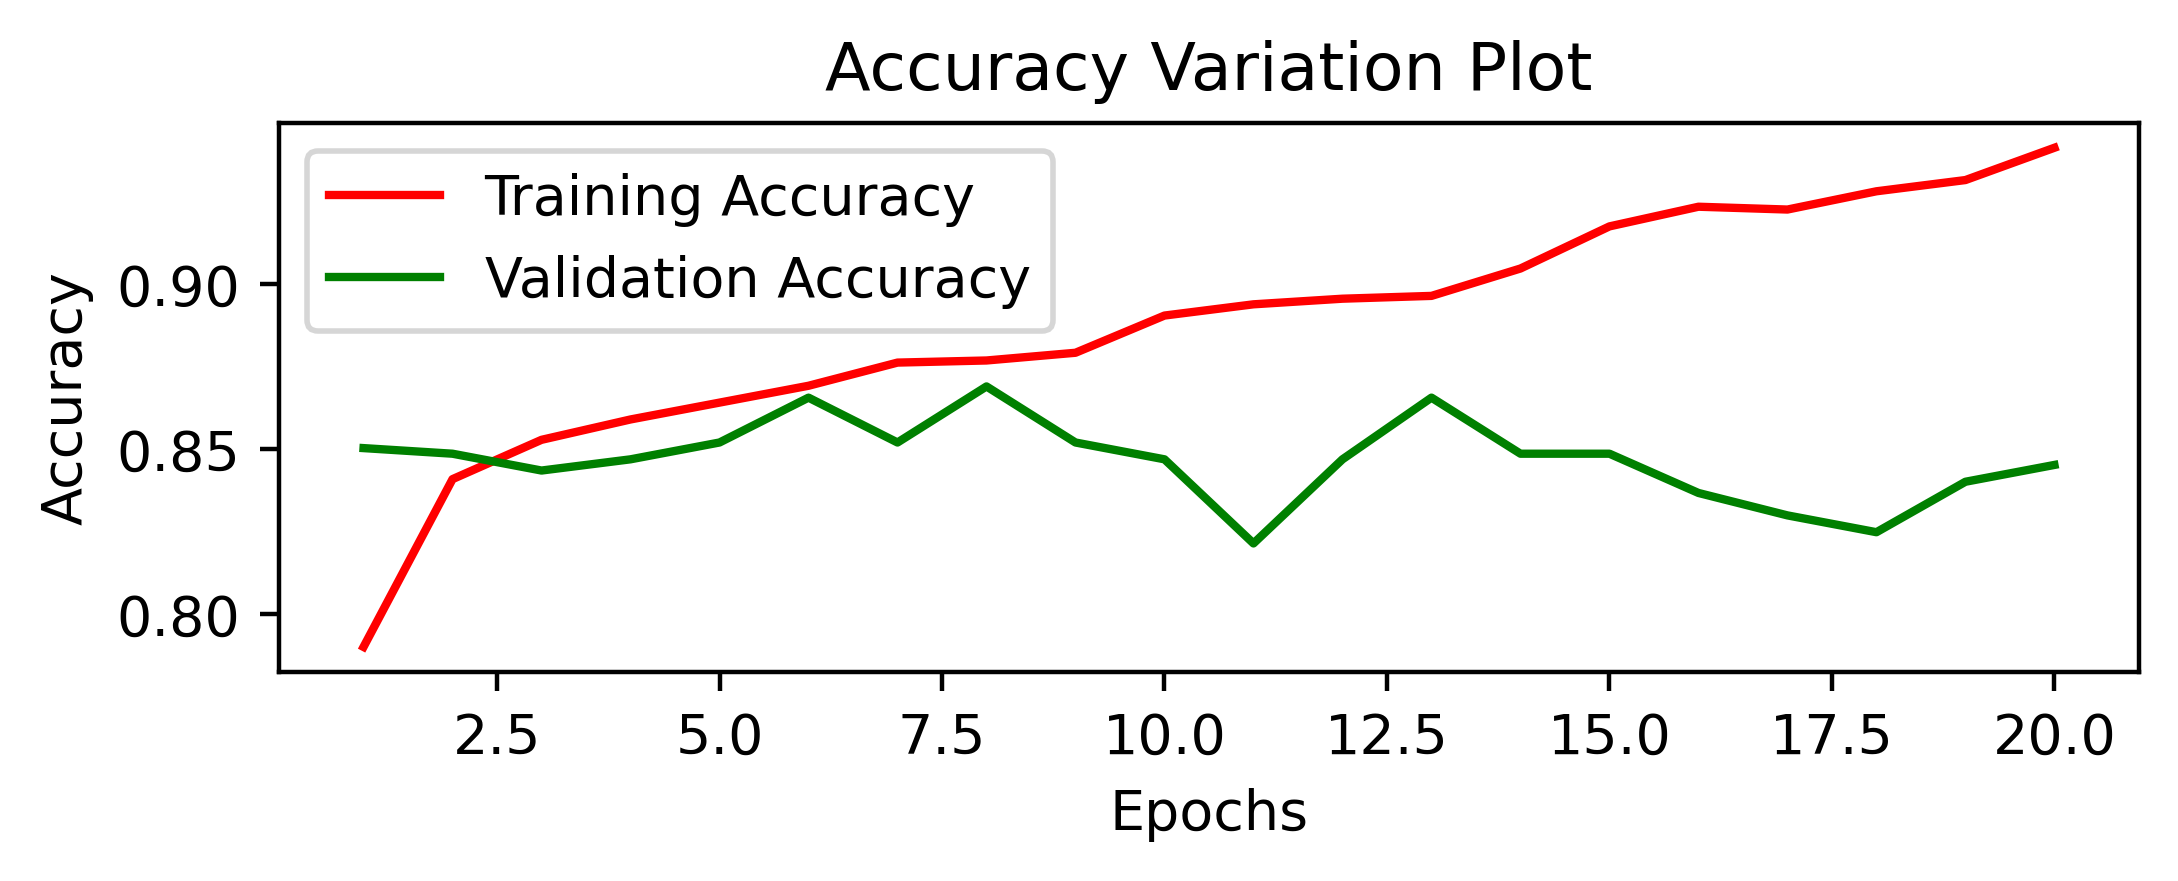

In [19]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

#plotting 
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Testing Model

In [20]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[0.07389956 0.9261004 ]
Predicted: 1
Original: 1


### Saving model and Verifying

In [21]:
model_00.save('Trained_model_00')    #saved as protobuf (.pb)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_00\assets


In [22]:
model_00.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 200)               3200      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 402       
Total params: 84,002
Trainable params: 84,002
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = tf.keras.models.load_model('Trained_model_00')
print(x_test[1])

[ 1.43204484  0.57824053 -1.19993744  0.03023417  0.74172663 -0.62490866
 -0.16652959 -0.49596609 -0.75912276  1.25611421  0.37627541 -0.34678076
  0.2127454   0.23377519 -0.35724018]


In [24]:
print(x_test[1].reshape( 1,-1))

[[ 1.43204484  0.57824053 -1.19993744  0.03023417  0.74172663 -0.62490866
  -0.16652959 -0.49596609 -0.75912276  1.25611421  0.37627541 -0.34678076
   0.2127454   0.23377519 -0.35724018]]


In [25]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[0.01700153 0.98299843]]
